In [686]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from scipy import optimize
from sklearn.model_selection import train_test_split

#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

%matplotlib inline

In [687]:
#Importamos el dataset
data = pd.read_csv('./bank-direct-marketing-campaigns.csv', delimiter=',')

In [688]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 30)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)
#mostramos el dataset
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [689]:
X = data[['age', 'education', 'default', 'housing','loan']]  # Ejemplo de nombres de columnas
y = data['y']  # Suponiendo que 'y' es la columna objetivo

print(X.head())  # Imprime las primeras filas de X para verificar
print(y.head())


   age    education  default housing loan
0   56     basic.4y       no      no   no
1   57  high.school  unknown      no   no
2   37  high.school       no     yes   no
3   40     basic.6y       no      no   no
4   56  high.school       no      no  yes
0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object


In [690]:

X.replace({'no': 0, 'yes': 2, 'unknown':1}, inplace=True)
y.replace({'no': 0, 'yes': 1, 'unknown':0}, inplace=True)
X['education'] = X['education'].replace({'illiterate':0,'unknown':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'professional.course':6,'university.degree':7})

# Imprimir los resultados
print('X después de la limpieza:')
print(X.head())
print('y después de la limpieza:')
print(y.head())


print(len(X))

print(len(y))

X después de la limpieza:
   age  education  default  housing  loan
0   56          2        0        0     0
1   57          5        1        0     0
2   37          5        0        2     0
3   40          3        0        0     0
4   56          5        0        0     2
y después de la limpieza:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64
41188
41188


C:\Users\richa\AppData\Local\Temp\ipykernel_16624\1897244921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'no': 0, 'yes': 2, 'unknown':1}, inplace=True)
C:\Users\richa\AppData\Local\Temp\ipykernel_16624\1897244921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'no': 0, 'yes': 2, 'unknown':1}, inplace=True)
C:\Users\richa\AppData\Local\Temp\ipykernel_16624\1897244921.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [691]:
def graficar_columnas_vs_otro(x, y, tipo_grafico='line', titulo_base='Gráfico de'):
    if isinstance(x, pd.DataFrame):
        # Si x es un DataFrame, iteramos sobre sus columnas
        for columna in x.columns:
            plt.figure()
            getattr(plt, tipo_grafico)(x[columna], y)
            plt.xlabel(columna)
            plt.ylabel('y')
            plt.title(f"{titulo_base} {columna} vs y")
            plt.grid(True)
            plt.show()
    else:
        # Si x no es un DataFrame, asumimos que es una lista o array
        for i in range(len(x)):
            plt.figure()
            getattr(plt, tipo_grafico)(x[i], y)
            plt.xlabel(f'Columna {i+1}')
            plt.ylabel('y')
            plt.title(f"{titulo_base} Columna {i+1} vs y")
            plt.grid(True)
            plt.show()

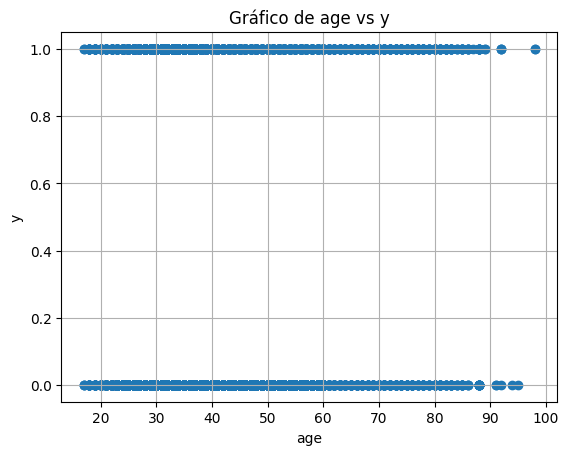

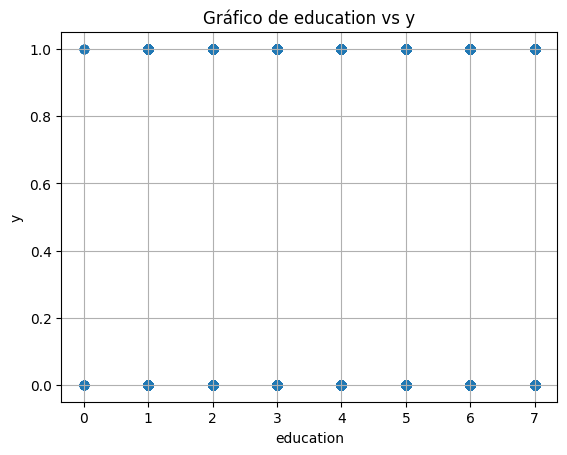

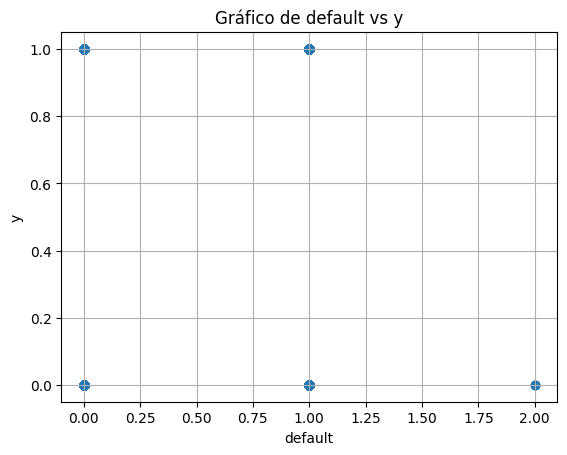

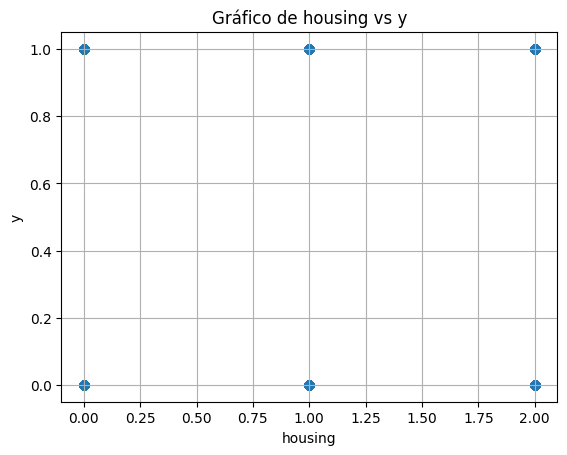

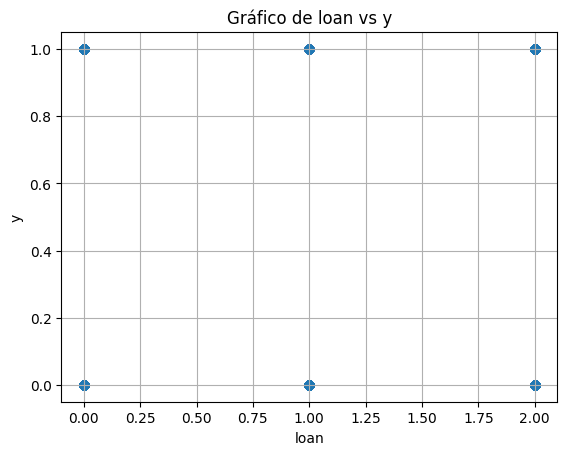

In [692]:
graficar_columnas_vs_otro(X, y, tipo_grafico='scatter')

In [693]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [694]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: age          40.024060
education     4.985627
default       0.208872
housing       1.071720
loan          0.327425
dtype: float64
Desviación estandar calculada: age          10.421123
education     1.809420
default       0.406682
housing       0.985302
loan          0.723607
dtype: float64


In [695]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=41)

In [696]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [697]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

In [698]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [699]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.03816283  0.00099933  0.00136767 -0.00334075  0.00040308 -0.00019774]
Una persona de 24 años, que curso la preparatoria, sin default ni hipoteca pero con prestamo personal  (usando el descenso por el gradiente):0


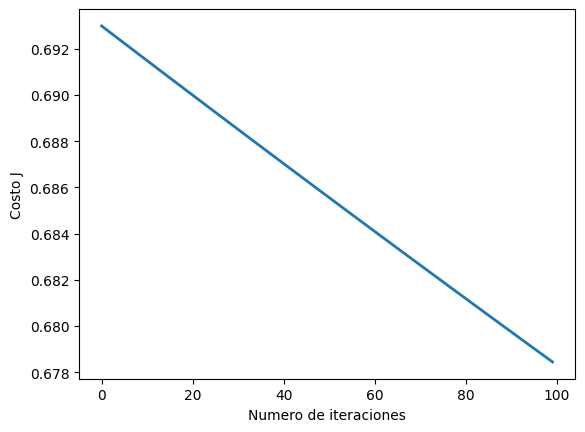

In [700]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,24,3,0,0,1]

X_array[1:6]=(X_array[1:6]-mu)/sigma
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Una persona de 24 años, que curso la preparatoria, sin default ni hipoteca pero con prestamo personal  (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [701]:
X_array2 = [33,6,0,0,0]

X_array2=(X_array2-mu)/sigma
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Una persona de 38 años, que curso 9a ños de primaria, no se sabe si tuvo default con hipoteca y con prestamo personal  (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

Una persona de 38 años, que curso 9a ños de primaria, no se sabe si tuvo default con hipoteca y con prestamo personal  (usando el descenso por el gradiente):0


In [702]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [703]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X_train, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.38637329 -0.0100118  -0.01393845  0.03386951 -0.00409867  0.00199416]
Gradiente en theta inicial (zeros):
	[0.3864, -0.0100, -0.0139]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [704]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2,0.2,0.2,0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X_train, y_train)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2   0.2   0.2   0.2]
Costo en theta prueba: 2.729
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.114, -0.011, -0.012]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [705]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.347
Costo esperado (aproximado): 0.203

theta:
	[-2.121, 0.164, 0.084]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


C:\Users\richa\AppData\Local\Temp\ipykernel_16624\3083860453.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [706]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [707]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 54,2,0,0,0], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_train)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 0.999%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 88.64 %
Precisión esperada (aproximadamente): 89.00 %
